In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("train.csv")

In [4]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
dataset[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


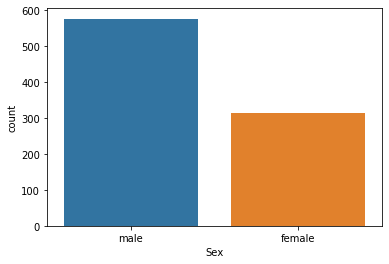

In [10]:
sns.countplot(dataset['Sex'])

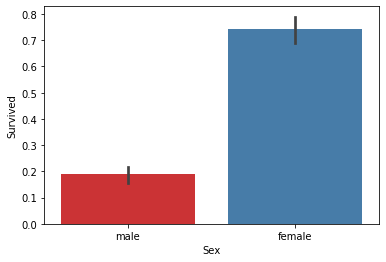

In [11]:
sns.barplot(x=dataset['Sex'],y=dataset['Survived'],palette="Set1")

In [12]:
dataset[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [13]:
dataset.Age.agg(['max','min','mean','median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

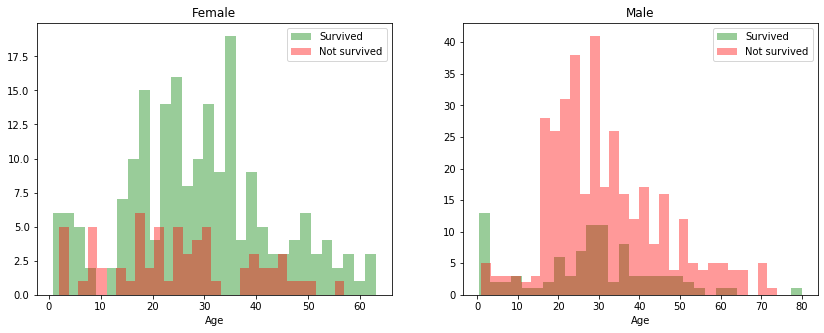

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
women = dataset[dataset['Sex']=='female']
men = dataset[dataset['Sex']=='male']
ax= sns.distplot(women[women['Survived']==1].Age.dropna(),bins=30,label="Survived",ax=axes[0],kde=False,color="green")
ax= sns.distplot(women[women['Survived']==0].Age.dropna(),bins=30,label="Not survived",ax=axes[0],kde=False,color="red")
ax.legend()
ax.set_title('Female')
ax= sns.distplot(men[men['Survived']==1].Age.dropna(),bins=30,label="Survived",ax=axes[1],kde=False,color="green")
ax= sns.distplot(men[men['Survived']==0].Age.dropna(),bins=30,label="Not survived",ax=axes[1],kde=False,color="red")
ax.legend()
_ = ax.set_title('Male')

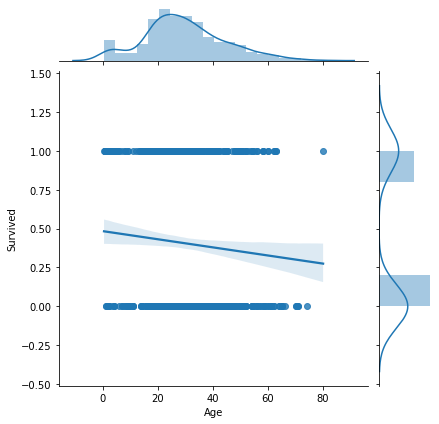

In [15]:
sns.jointplot(x='Age',y='Survived',kind="regg",data=dataset)

In [16]:
dataset[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


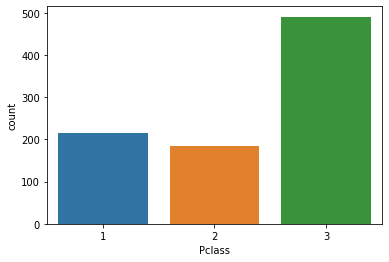

In [17]:
sns.countplot(dataset['Pclass'])

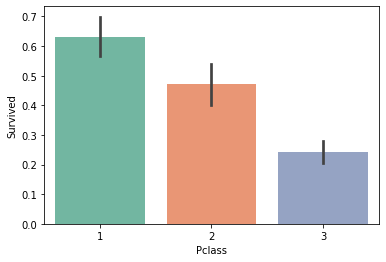

In [18]:
sns.barplot(x=dataset['Pclass'],y=dataset['Survived'],palette="Set2")

In [19]:
dataset[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [20]:
dataset[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [21]:
dataset.Fare.agg(['max','min','mean','median'])

max       512.329200
min         0.000000
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

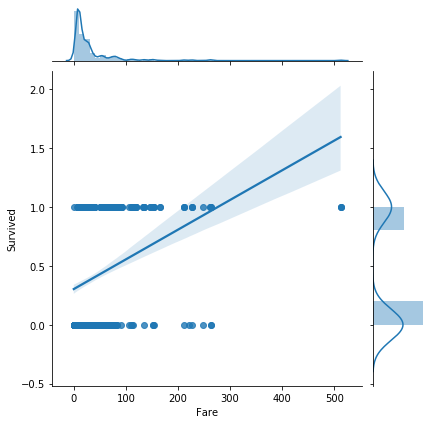

In [22]:
sns.jointplot(x='Fare',y='Survived',kind="regg",data=dataset)

In [23]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
dataset[dataset.Embarked=='S'].Survived.value_counts()

0    427
1    217
Name: Survived, dtype: int64

In [25]:
dataset[dataset.Embarked=='C'].Survived.value_counts()

1    93
0    75
Name: Survived, dtype: int64

In [26]:
dataset[dataset.Embarked=='Q'].Survived.value_counts()

0    47
1    30
Name: Survived, dtype: int64

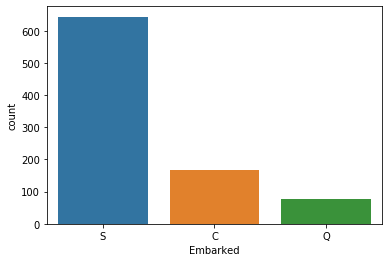

In [27]:
sns.countplot(dataset['Embarked'])

In [28]:
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

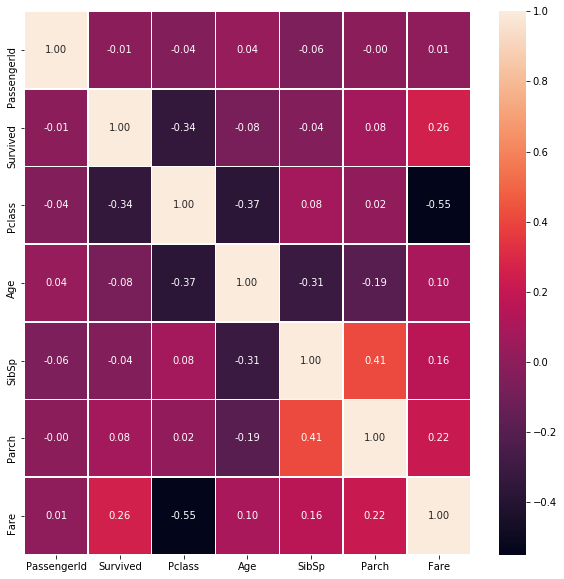

In [29]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,linewidths=.5,fmt='.2f',ax=ax)

In [30]:
dataset1 = dataset[['Pclass','Sex','Age','Fare']]

In [31]:
dataset1.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [32]:
dataset1.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [33]:
x =pd.get_dummies(dataset1)
x.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [34]:
y = dataset.iloc[:,1]
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[0])],remainder="passthrough")
x= np.array(ct.fit_transform(x))
print(x)

[[ 0.      0.      1.     ...  7.25    0.      1.    ]
 [ 1.      0.      0.     ... 71.2833  1.      0.    ]
 [ 0.      0.      1.     ...  7.925   1.      0.    ]
 ...
 [ 0.      0.      1.     ... 23.45    1.      0.    ]
 [ 1.      0.      0.     ... 30.      0.      1.    ]
 [ 0.      0.      1.     ...  7.75    0.      1.    ]]


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(x)
x= imputer.transform(x)
print(x)

[[ 0.      0.      1.     ...  7.25    0.      1.    ]
 [ 1.      0.      0.     ... 71.2833  1.      0.    ]
 [ 0.      0.      1.     ...  7.925   1.      0.    ]
 ...
 [ 0.      0.      1.     ... 23.45    1.      0.    ]
 [ 1.      0.      0.     ... 30.      0.      1.    ]
 [ 0.      0.      1.     ...  7.75    0.      1.    ]]


In [37]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x = norm.fit_transform(x)
print(x)

[[0.         0.         1.         ... 0.01415106 0.         1.        ]
 [1.         0.         0.         ... 0.13913574 1.         0.        ]
 [0.         0.         1.         ... 0.01546857 1.         0.        ]
 ...
 [0.         0.         1.         ... 0.04577135 1.         0.        ]
 [1.         0.         0.         ... 0.0585561  0.         1.        ]
 [0.         0.         1.         ... 0.01512699 0.         1.        ]]


In [38]:
x.shape

(891, 7)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
print(x_train)

[[0.         0.         1.         ... 0.02975782 1.         0.        ]
 [0.         1.         0.         ... 0.02049464 0.         1.        ]
 [0.         1.         0.         ... 0.07222739 0.         1.        ]
 ...
 [0.         0.         1.         ... 0.0150944  0.         1.        ]
 [0.         0.         1.         ... 0.03396254 1.         0.        ]
 [0.         1.         0.         ... 0.07612293 0.         1.        ]]


In [40]:
print(x_test)

[[0.         0.         1.         ... 0.02822072 0.         1.        ]
 [0.         0.         1.         ... 0.01473662 0.         1.        ]
 [0.         0.         1.         ... 0.05684821 0.         1.        ]
 ...
 [1.         0.         0.         ... 0.22109808 1.         0.        ]
 [0.         0.         1.         ... 0.01533038 0.         1.        ]
 [0.         0.         1.         ... 0.01571255 0.         1.        ]]


In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [42]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
regressor.score(x_test,y_test)

0.4208011350769928

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=4)
x_poly= poly_reg.fit_transform(x)
regressorPoly= LinearRegression()
regressorPoly.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
regressorPoly.score(x_poly, y)

0.4988636649611491

In [46]:
from sklearn.linear_model import LogisticRegression
regressor1 = LogisticRegression()
regressor1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
regressor1.score(x_test,y_test)

0.776536312849162

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

In [49]:
dtree.score(x_test,y_test)

0.7932960893854749

In [50]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [51]:
random_forest.score(x_test,y_test)

0.8324022346368715